Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  flat
done with rho plot in  74.51853275299072  seconds
done with B Squared plot in  28.342220544815063  seconds
done with alpha plot in  24.326964139938354  seconds
done with stress plot in  23.837693452835083  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  0.25
done with rho plot in  68.94869661331177  seconds
done with B Squared plot in  28.52244257926941  seconds
done with alpha plot in  25.100616931915283  seconds
done with stress plot in  24.058578968048096  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  1
done with rho plot in  69.36402606964111  seconds
done with B Squared plot in  28.619422674179077  seconds
done with alpha plot in  24.97812008857727  seconds
done with stress plot in  24.482603788375854  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  5
done with rho plot in  69.122908115386

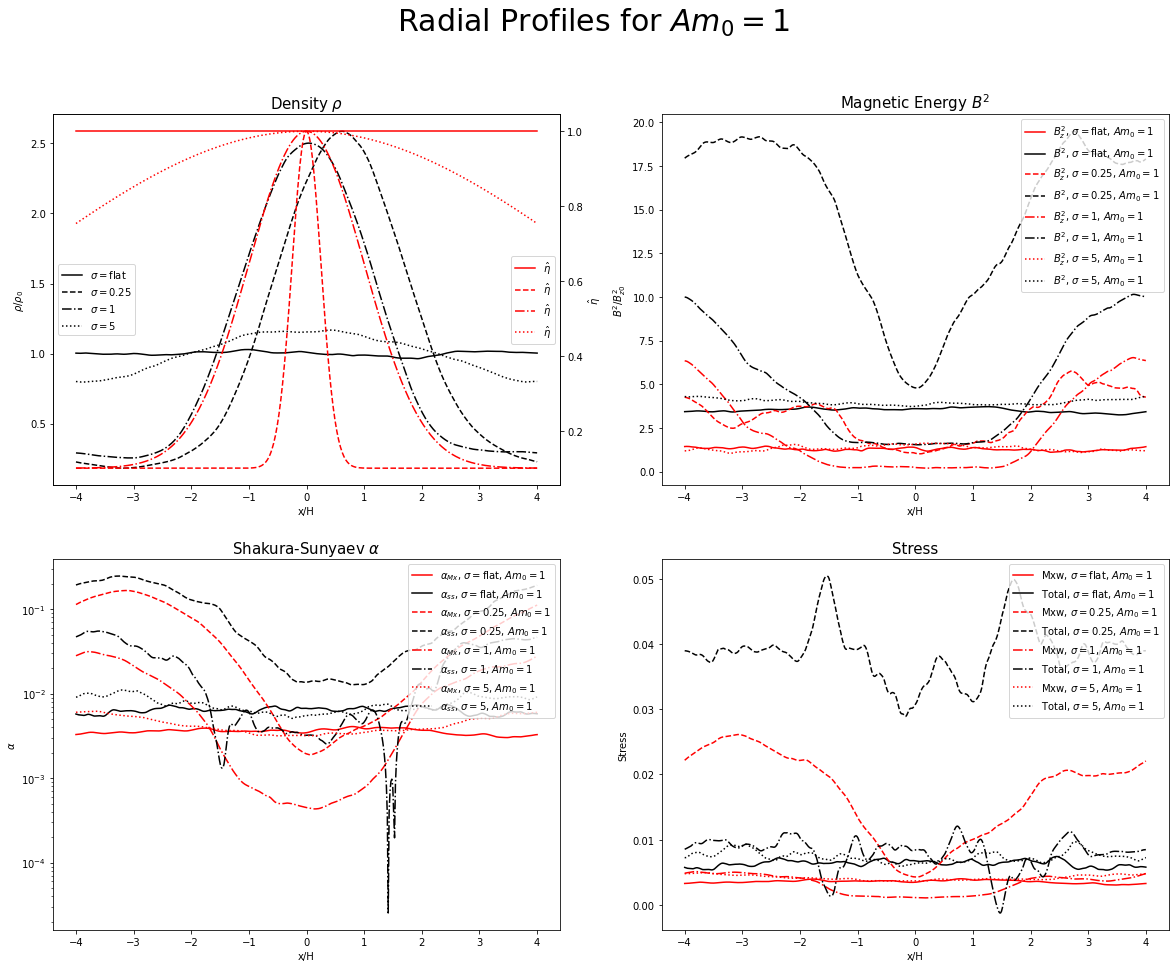

In [1]:
#plot multiple runs on the same set of axes, limit 4 per customer

#see complete_profiles and oned_profiles for development
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=1
amp=1
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 1$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

def summary_plots(file_path_list,fig,ax):
    #set list of line styles for discerning different runs
    style_list = ['solid','dashed','dashdot','dotted']
    #setup axis overlay for eta profiles  
    ax2 = ax[0,0].twinx()
    ax2.set_ylabel('$\\hat{\\eta}$')
    for file_path in file_path_list:
        #plot the four requested plots for a given filepath, but keep the axes the same for all
        #read amplitude and sign and sigma
        sgn = 1
        amp = 1
        sig = 1
        eta = 1
        if 'sig_point25' in file_path:
            sig = .25
            style = 'dashed'
        if 'sig_1' in file_path:
            sig = 1
            style = 'dashdot'
        if 'sig_5' in file_path:
            sig = 5
            style = 'dotted'
        if 'inv'in file_path:
            sgn = -1
        if 'amp_point5'in file_path:
            amp = .5
            eta = 1/amp
            #style = 'dashed'
        if 'amp_1' in file_path:
            amp = 1
            eta = 1/amp
            #style = 'dotdash'
        if 'amp_5' in file_path:
            amp = 5
            eta = 1/amp
            #style = 'dotted'
        if 'const' in file_path:
            sig = 'flat'
            style = 'solid'
        #density but don't include percentiles
        print('Figure set up; current parameters are: sign = ',sgn,', amplitude = ',amp,', sigma = ',sig)
        #rho plot -----------------------------------------------------------------
        rho_time = time.time()
        prof_rho,upper_rho,lower_rho = cmp.avg_rho_prof(file_path)
        ax[0,0].plot(x_arr,prof_rho,'k',linestyle=style,label=str('$\sigma =$'+str(sig)))
        #ax[0,0].fill_between(x_arr,lower_rho,upper_rho,color ='c')
        ax[0,0].legend(loc=6)
        ax[0,0].set_xlabel('x/H')
        ax[0,0].set_ylabel('$\\rho/\\rho_0$')
        subtitle = 'Density $\\rho$'
        ax[0,0].set_title(subtitle)
        print('done with rho plot in ',(time.time()-rho_time),' seconds')
    
        #overlay the eta profile

        if sgn == -1:
            if sig == 'flat':
                y_array = eta * (x_arr**0) #force to have same length as x arr
            else:    
                y_array = eta*(1-.9*np.exp(-(x_arr**2)/(2*(sig**2)))) 
        if sgn == 1:
            if sig == 'flat':
                y_array = eta * (x_arr**0) #force to have same length as x arr
            else: 
                y_array = eta*(.9*np.exp(-(x_arr**2)/(2*(sig**2)))+.1) 
        ax2.plot(x_arr,y_array,'r',linestyle=style,label = '$\\hat{\\eta}$' )
        ax2.legend(loc=7)
        
        #magnetic energy plot------------------------------------------------------------------------
        mag_time = time.time()
        #Bz0 as set by initial plasma beta
        Bzsquared0 = 2/400
        prof_bx,prof_by,prof_bz,prof_bmag = cmp.avg_bsquared_prof(file_path)
        #ax[0,1].semilogy(x_arr,prof_bx/Bzsquared0,'b',linestyle=style,label =('$B_x^2$, $\sigma=$'+str(sig))+', $Am_0=$'+str(amp))
        #ax[0,1].plot(x_arr,prof_by/Bzsquared0,'r',linestyle=style,label ='$B_y^2$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[0,1].plot(x_arr,prof_bz/Bzsquared0,'r',linestyle=style,label ='$B_z^2$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[0,1].plot(x_arr,prof_bmag/Bzsquared0,'k',linestyle=style,label ='$B^2$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[0,1].legend(loc=1)
        ax[0,1].set_xlabel('x/H')
        ax[0,1].set_ylabel('$B^2/B_{z0}^2$')
        subtitle = 'Magnetic Energy $B^2$'
        ax[0,1].set_title(subtitle)
        print('done with B Squared plot in ',(time.time()-mag_time),' seconds')
        #shakura sunyaev alpha--------------------------------------------------------------------------
        alpha_time = time.time()
        prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_alpha_prof(file_path)
        #ax[1,0].plot(x_arr,prof_avg_reyn,'b',linestyle=style,label='$\\alpha_{Re}$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,0].semilogy(x_arr,np.absolute(prof_avg_maxw),'r',linestyle=style,label='$\\alpha_{Mx}$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,0].semilogy(x_arr,np.absolute(prof_avg_tot),'k',linestyle=style,label='$\\alpha_{ss}$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,0].legend(loc=1)
        ax[1,0].set_xlabel('x/H')
        ax[1,0].set_ylabel('$\\alpha$')
        subtitle = 'Shakura-Sunyaev $\\alpha$'
        ax[1,0].set_title(subtitle)
        print('done with alpha plot in ',(time.time()-alpha_time),' seconds')
        #stress
        stress_time = time.time()
        prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_stress_prof(file_path)
        #ax[1,1].plot(x_arr,prof_avg_reyn,'b',linestyle=style,label='Re, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,1].plot(x_arr,prof_avg_maxw,'r',linestyle=style,label='Mxw, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,1].plot(x_arr,(prof_avg_tot),'k',linestyle=style,label='Total, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,1].legend(loc=1)
        ax[1,1].set_xlabel('x/H')
        ax[1,1].set_ylabel('Stress')
        subtitle = 'Stress'
        ax[1,1].set_title(subtitle)   
        print('done with stress plot in ',(time.time()-stress_time),' seconds')
    return ('done')
    
    
    
file_path_list = [
    "./ad_prof/amp_1/sig_const",
    "./ad_prof/amp_1/sig_point25",
    "./ad_prof/amp_1/sig_1",
    "./ad_prof/amp_1/sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_1_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  flat
done with rho plot in  75.52707242965698  seconds
done with B Squared plot in  28.90514898300171  seconds
done with alpha plot in  25.049047470092773  seconds
done with stress plot in  25.079034090042114  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  73.68094778060913  seconds
done with B Squared plot in  28.769477367401123  seconds
done with alpha plot in  24.784114122390747  seconds
done with stress plot in  24.362391233444214  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  1
done with rho plot in  74.70021224021912  seconds
done with B Squared plot in  28.163835525512695  seconds
done with alpha plot in  24.243706464767456  seconds
done with stress plot in  24.12879514694214  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  5
done with rho plot in  74.3612

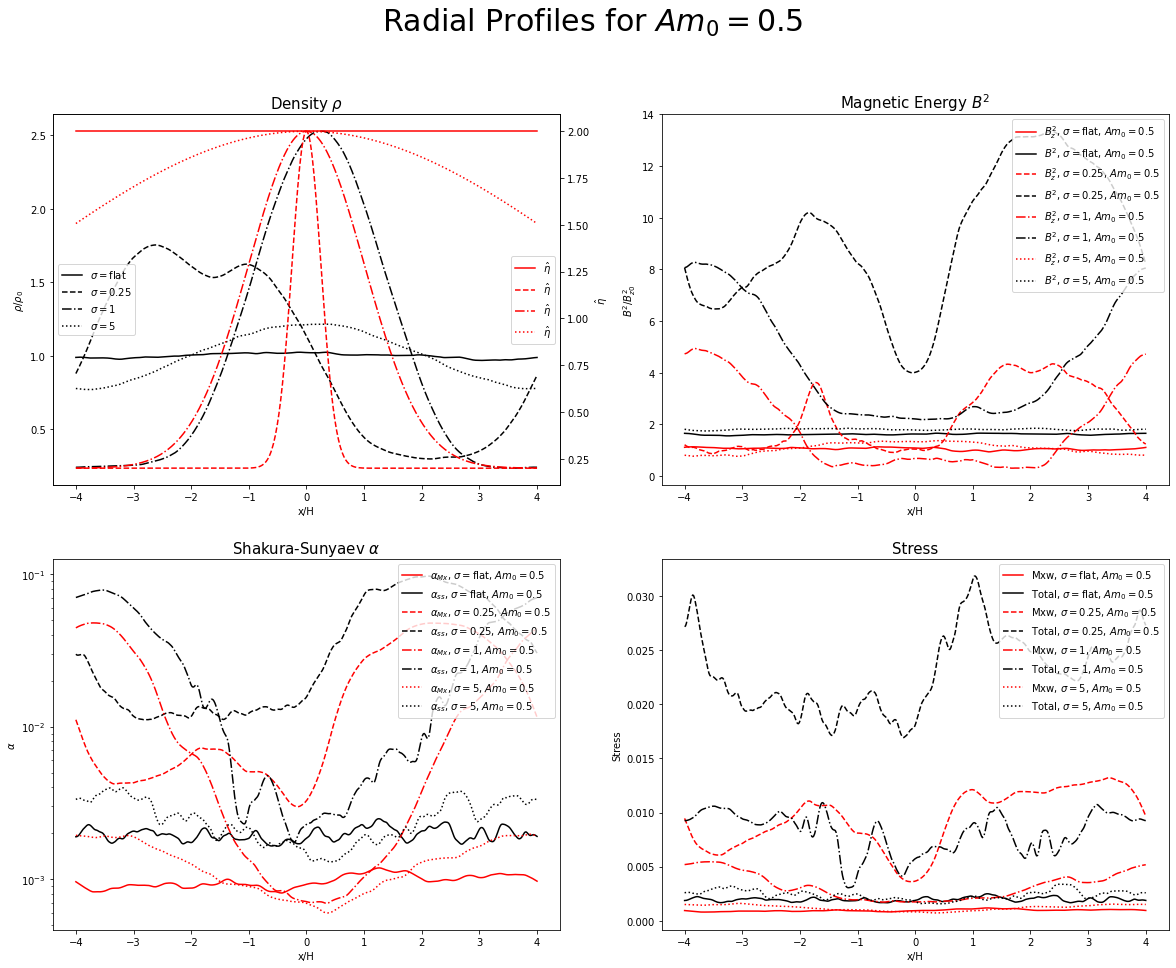

In [2]:
#same but for Am_0 = .5
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=1
amp=1
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 0.5$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_point5/sig_const",
    "./ad_prof/amp_point5/sig_point25",
    "./ad_prof/amp_point5/sig_1",
    "./ad_prof/amp_point5/sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_point5_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  flat
done with rho plot in  72.39735817909241  seconds
done with B Squared plot in  29.767669916152954  seconds
done with alpha plot in  26.465601444244385  seconds
done with stress plot in  26.10212016105652  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  0.25
done with rho plot in  72.83643102645874  seconds
done with B Squared plot in  28.75162649154663  seconds
done with alpha plot in  24.364440202713013  seconds
done with stress plot in  24.082449197769165  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  1
done with rho plot in  77.74293732643127  seconds
done with B Squared plot in  29.711572408676147  seconds
done with alpha plot in  24.980802059173584  seconds
done with stress plot in  25.800745010375977  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  5
done with rho plot in  67.650571107864

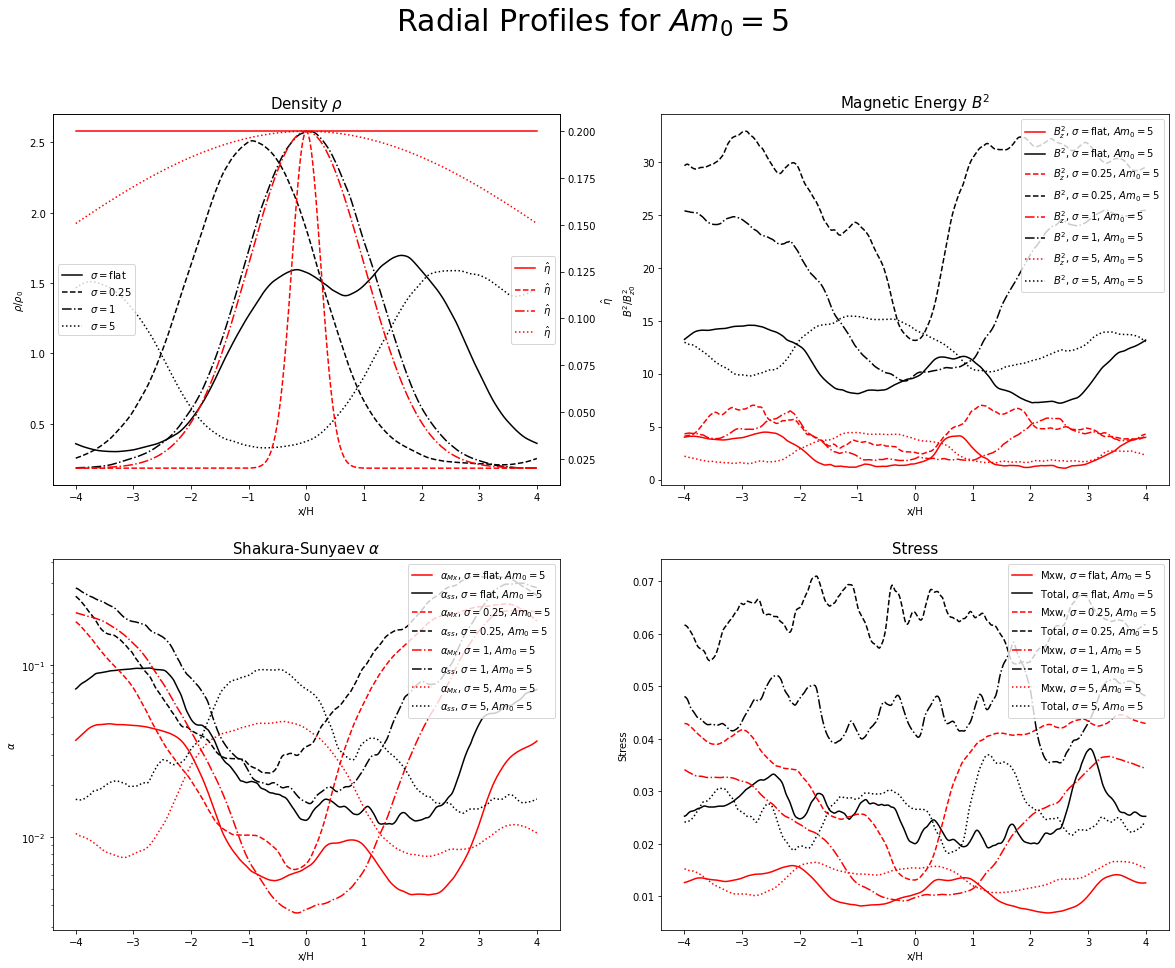

In [3]:
#same but for Am_0 = 5
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=1
amp=1
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 5$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_5/sig_const",
    "./ad_prof/amp_5/sig_point25",
    "./ad_prof/amp_5/sig_1",
    "./ad_prof/amp_5/sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_5_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  flat
done with rho plot in  74.20067858695984  seconds
done with B Squared plot in  31.688176155090332  seconds
done with alpha plot in  27.763322353363037  seconds
done with stress plot in  27.067994356155396  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  1 , sigma =  0.25
done with rho plot in  75.07030916213989  seconds
done with B Squared plot in  29.47942566871643  seconds
done with alpha plot in  25.677396297454834  seconds
done with stress plot in  25.055944681167603  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  1 , sigma =  1
done with rho plot in  72.84085011482239  seconds
done with B Squared plot in  28.897345066070557  seconds
done with alpha plot in  24.34272837638855  seconds
done with stress plot in  24.80932903289795  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  1 , sigma =  5
done with rho plot in  73.9904267787

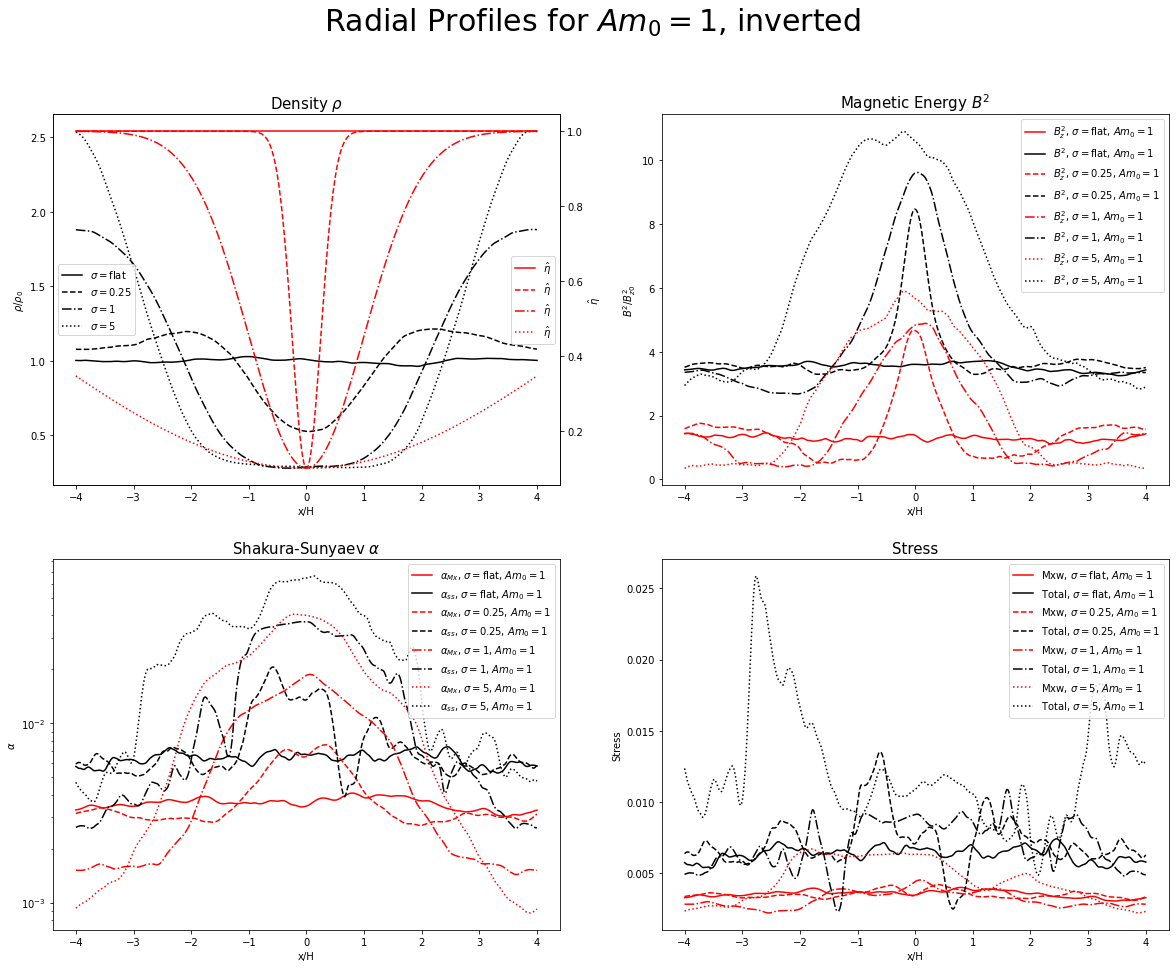

In [4]:
#same but for inverted amp 1
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=-1
amp=1
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 1$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_1/sig_const",
    "./ad_prof/amp_1/inv_sig_point25",
    "./ad_prof/amp_1/inv_sig_1",
    "./ad_prof/amp_1/inv_sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_1_inverted_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  flat
done with rho plot in  76.71354341506958  seconds
done with B Squared plot in  29.048320770263672  seconds
done with alpha plot in  24.859866857528687  seconds
done with stress plot in  24.55009961128235  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  75.28687739372253  seconds
done with B Squared plot in  28.64225459098816  seconds
done with alpha plot in  24.871797561645508  seconds
done with stress plot in  24.147042274475098  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  1
done with rho plot in  70.05293273925781  seconds
done with B Squared plot in  28.77125883102417  seconds
done with alpha plot in  24.998316287994385  seconds
done with stress plot in  24.734670162200928  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  5
done with rho plot in  69.27

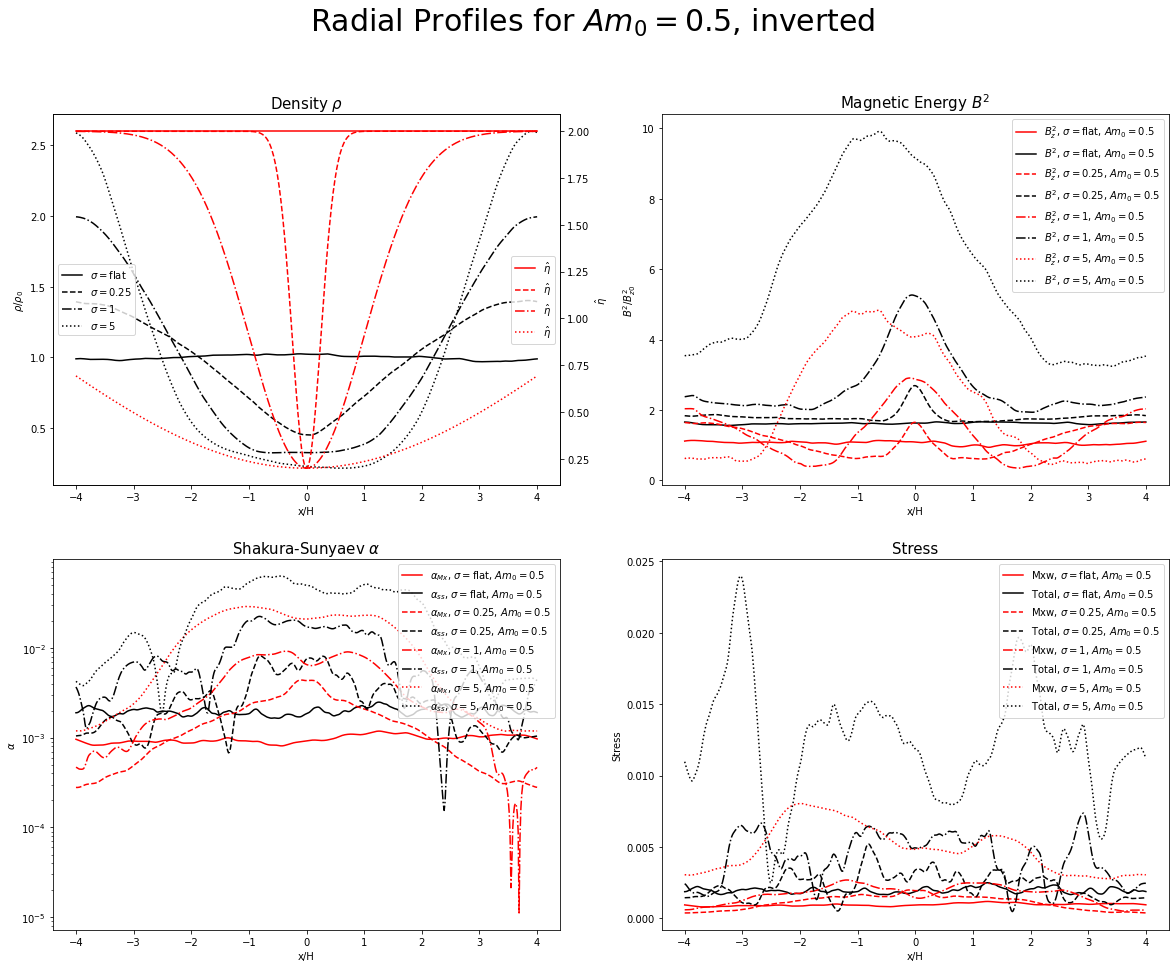

In [5]:
#same but for inverted amp point5
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=-1
amp=0.5
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 0.5$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_point5/sig_const",
    "./ad_prof/amp_point5/inv_sig_point25",
    "./ad_prof/amp_point5/inv_sig_1",
    "./ad_prof/amp_point5/inv_sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_point5_inverted_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  flat
done with rho plot in  72.08446264266968  seconds
done with B Squared plot in  28.571356296539307  seconds
done with alpha plot in  25.288744926452637  seconds
done with stress plot in  24.56792688369751  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  5 , sigma =  0.25
done with rho plot in  69.6601312160492  seconds
done with B Squared plot in  28.555649995803833  seconds
done with alpha plot in  24.21954584121704  seconds
done with stress plot in  24.207634925842285  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  5 , sigma =  1
done with rho plot in  68.46397256851196  seconds
done with B Squared plot in  29.010287284851074  seconds
done with alpha plot in  24.74885869026184  seconds
done with stress plot in  24.981258869171143  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  5 , sigma =  5
done with rho plot in  70.92519783973

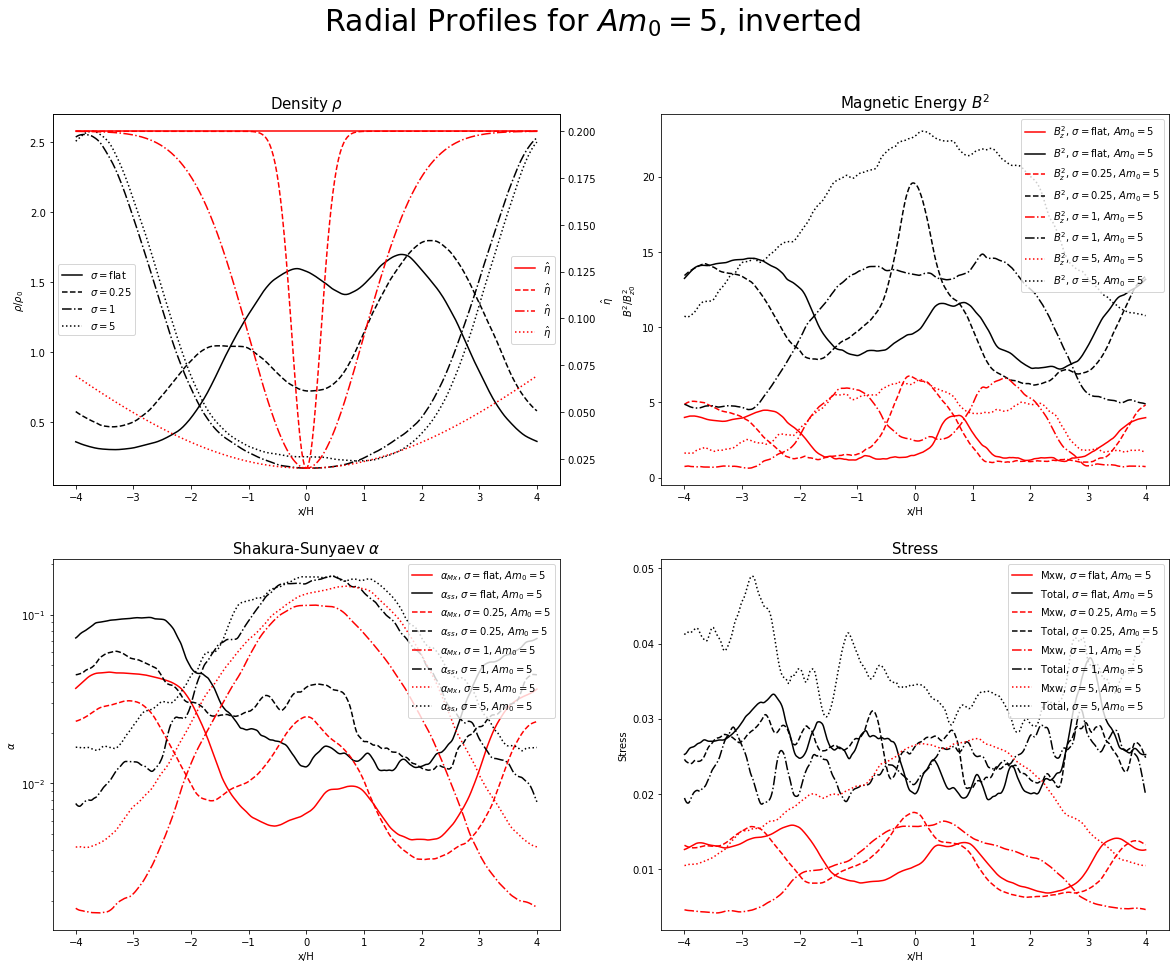

In [6]:
#same but for inverted amp 5
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=-1
amp=5
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 5$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_5/sig_const",
    "./ad_prof/amp_5/inv_sig_point25",
    "./ad_prof/amp_5/inv_sig_1",
    "./ad_prof/amp_5/inv_sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_5_inverted_summary_plots.pdf')
plt.show()
